In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape,Y_train.shape)

(60000, 28, 28) (60000,)


3


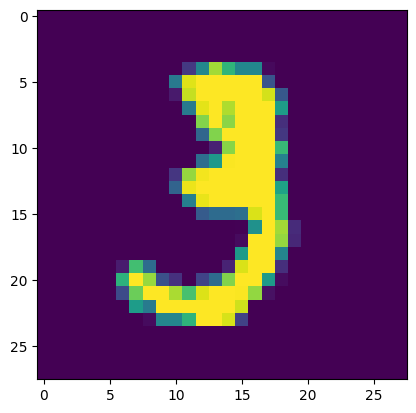

In [5]:
plt.imshow(X_train[10])
print(Y_train[10])


In [6]:
print(Y_train.shape)

(60000,)


In [7]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
X_train= X_train/255
X_test=X_test/255

In [9]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8780 - loss: 0.4258
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9653 - loss: 0.1141
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9771 - loss: 0.0738
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9844 - loss: 0.0521
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9868 - loss: 0.0405
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9897 - loss: 0.0321
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9910 - loss: 0.0272
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9930 - loss: 0.0214
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9939 - loss: 0.0195
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9943 - loss: 0.0159


In [12]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.1192
0.9764999747276306
0.10180599987506866


In [13]:
print(X_test.shape)

(10000, 28, 28)


In [14]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


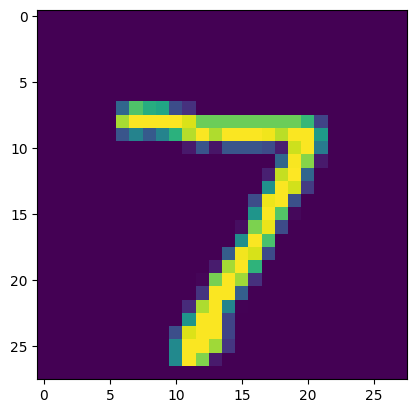

In [15]:
plt.imshow(X_test[0])

In [16]:
print(Y_test[0])

7


In [17]:
y_output=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
y_output[0]

array([5.6676143e-14, 5.0841723e-16, 2.0157256e-11, 5.8549293e-08,
       2.1790634e-17, 2.0026251e-13, 1.8410174e-20, 9.9999982e-01,
       1.7981786e-12, 9.5034160e-08], dtype=float32)

In [19]:
np.argmax(y_output[0])

np.int64(7)

In [20]:
Y_pred_labels=[np.argmax(i) for i in y_output]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [21]:
confusion = confusion_matrix(Y_test,Y_pred_labels)

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
X_train[0].shape

(28, 28)

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    1,    3,    3,    2,    2,    7],
       [   0, 1117,    4,    1,    7,    1,    2,    1,    2,    0],
       [   3,    2, 1003,    4,    6,    0,    2,    5,    7,    0],
       [   0,    0,    4,  987,    0,    3,    0,    4,    5,    7],
       [   0,    0,    1,    0,  972,    0,    1,    4,    0,    4],
       [   1,    0,    0,    8,    0,  874,    1,    1,    4,    3],
       [   1,    2,    0,    1,   10,    9,  933,    1,    1,    0],
       [   0,    3,    6,    0,    4,    0,    0, 1006,    2,    7],
       [   2,    3,    2,    7,    4,    3,    4,    3,  944,    2],
       [   0,    3,    0,    4,   22,    3,    1,    3,    4,  969]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

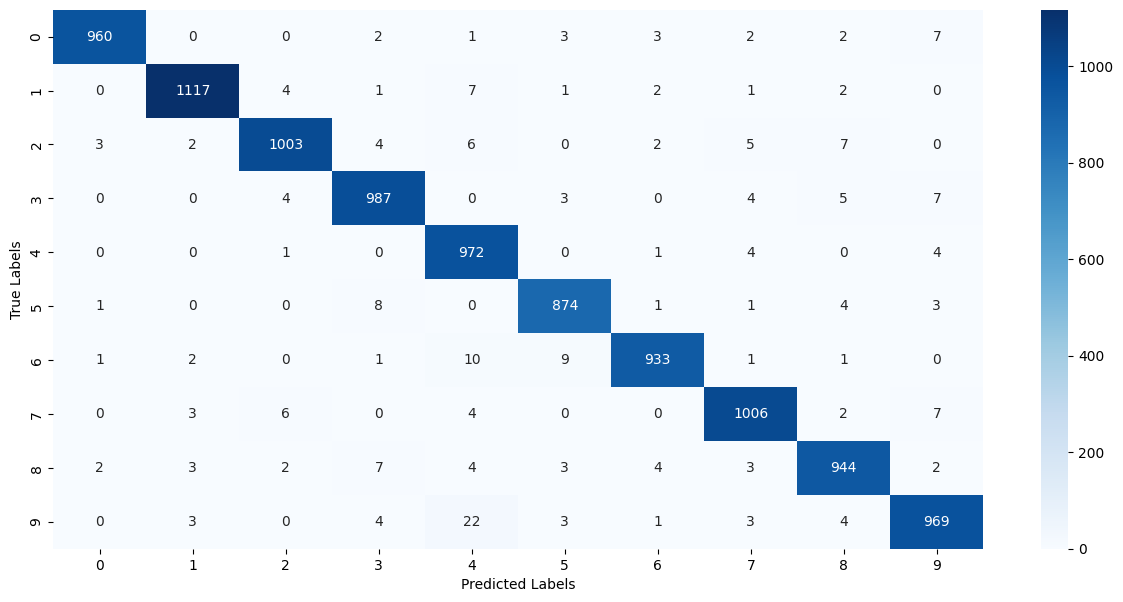

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
#TESTING THE MODEL ON NEW DATA

In [26]:
input_image='/content/ChatGPT Image Sep 6, 2025, 10_07_59 PM.png'

In [27]:
type(input_image)

str

In [28]:
img = cv2.imread(input_image)

In [29]:
img.shape

(1024, 1024, 3)

In [30]:
img=cv2.resize(img,(28,28))

In [31]:
img=img/255

In [32]:
img_uint8 = img.astype('uint8')
img_new = cv2.cvtColor(img_uint8, cv2.COLOR_BGR2GRAY)


In [33]:
print(img.shape)

(28, 28, 3)


In [34]:
img_reshaped=np.reshape(img_new,[1,28,28])

In [35]:
final_img=model.predict(img_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [36]:
print(final_img)

[[5.21912078e-08 1.29504197e-05 1.07959895e-05 1.20797470e-01
  3.71090209e-06 1.20475546e-01 2.98002959e-07 3.19504281e-08
  7.48583138e-01 1.01159532e-02]]


In [37]:
input_pred_label = np.argmax(final_img)

In [41]:
input_pred_label

np.int64(8)